<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imbalanced-data:-Credit-Card-Fraud" data-toc-modified-id="Imbalanced-data:-Credit-Card-Fraud-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imbalanced data: Credit Card Fraud</a></span></li><li><span><a href="#Data-set-informations" data-toc-modified-id="Data-set-informations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data set informations</a></span></li><li><span><a href="#Resampling-Methods" data-toc-modified-id="Resampling-Methods-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Resampling Methods</a></span><ul class="toc-item"><li><span><a href="#Random-under-Sampling" data-toc-modified-id="Random-under-Sampling-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Random under-Sampling</a></span><ul class="toc-item"><li><span><a href="#Dimetion-reduction-:-t-SNE,-PCA" data-toc-modified-id="Dimetion-reduction-:-t-SNE,-PCA-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Dimetion reduction : t-SNE, PCA</a></span></li></ul></li><li><span><a href="#Synthetic-Minority-oversampling-Technique--(SMOTE)" data-toc-modified-id="Synthetic-Minority-oversampling-Technique--(SMOTE)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Synthetic Minority oversampling Technique  (SMOTE)</a></span></li></ul></li><li><span><a href="#LogisticRegression()-with-and-with-out-resampling" data-toc-modified-id="LogisticRegression()-with-and-with-out-resampling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>LogisticRegression() with and with out resampling</a></span></li><li><span><a href="#Random-Forests-Classifiers" data-toc-modified-id="Random-Forests-Classifiers-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Random Forests Classifiers</a></span><ul class="toc-item"><li><span><a href="#Model-adjustments" data-toc-modified-id="Model-adjustments-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Model adjustments</a></span></li></ul></li><li><span><a href="#Ensemble-methods:-Voting-classifier" data-toc-modified-id="Ensemble-methods:-Voting-classifier-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Ensemble methods: Voting classifier</a></span></li><li><span><a href="#Unsupervised-learning-for-freud-detection" data-toc-modified-id="Unsupervised-learning-for-freud-detection-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Unsupervised learning for freud detection</a></span><ul class="toc-item"><li><span><a href="#Assiging-fraud-and-non-fraud-by-KMEANS-sampling" data-toc-modified-id="Assiging-fraud-and-non-fraud-by-KMEANS-sampling-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Assiging fraud and non-fraud by KMEANS sampling</a></span></li><li><span><a href="#Other-clustering-fraud-detection-methods:-DBscan" data-toc-modified-id="Other-clustering-fraud-detection-methods:-DBscan-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Other clustering fraud detection methods: DBscan</a></span></li></ul></li></ul></div>

# Imbalanced data: Credit Card Fraud
The main goal for this dataset is to identify the froud transactions so the companies do not need to pay for the money that customers did not buy. Algorithm of datacamp course are used to interpret the datasets.



# Data set informations
The dataset contains transactions in two days, where 492 frauds out of 284,315 transactions were identified. It has 30 input features and 1 target variable. The dataset is highly unbalanced, the positive class (frauds) account for 0.173% of all transactions.

V1 to V28 are the informations that stays confidents for the public.

In [14]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections



# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


In [127]:
df = pd.read_csv('dataset/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Is it any zero in this dataset?

In [4]:
# Good No Null Values!
df.isnull().sum().max()

0

In [5]:
# The classes are heavily skewed we need to solve this issue later.
print('Percent of No Frauds transaction', df['Class'].value_counts()[0]/len(df) * 100)
print('Percent of Frauds transtaction', df['Class'].value_counts()[1]/len(df) * 100)

Percent of No Frauds transaction 99.82725143693798
Percent of Frauds transtaction 0.1727485630620034


Since the ratio is very low we have to do re-sample of our data. We can also take look at the distribution of each feature.


(0.0, 172792.0)

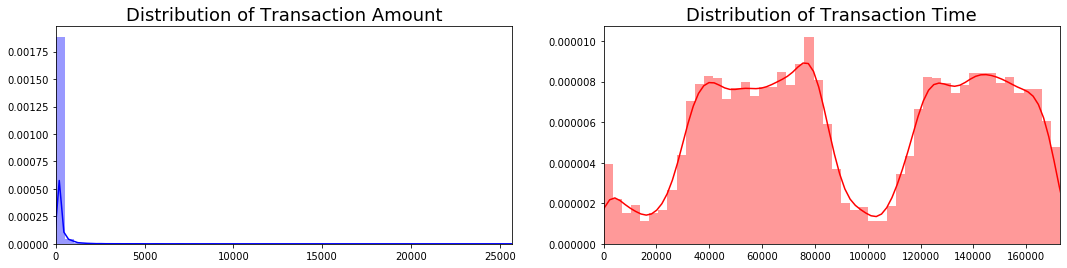

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='b')
ax[0].set_title('Distribution of Transaction Amount', fontsize=18)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='r')
ax[1].set_title('Distribution of Transaction Time', fontsize=18)
ax[1].set_xlim([min(time_val), max(time_val)])

# Resampling Methods
For this case we need to undersample the majorty class or oversample the minority class

With random under-sampling we throw away a lot of data.

Oversampling:
At the first solution we just copy the minority data, so we train our model on a lots of duplicates.

##  Random under-Sampling

For the first step we will do the Scaling and Distributing.
Scaled amount and scaled time are the columns with scaled values.
There are 492 cases of fraud in our dataset so we can randomly get 492 cases of non-fraud to create our new sub dataframe and creat a new sub-sample.




In [147]:
from sklearn.preprocessing import StandardScaler, RobustScaler

df = pd.read_csv('dataset/creditcard.csv')

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

df1 = df.pop('Class')
df.insert(30, 'Class', df1)

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,-0.994983,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,-0.994983,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,-0.994960,0


In [146]:
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

print(new_df.shape)
new_df.head()

(984, 31)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time,Class
73682,1.071479,-0.324592,1.034996,1.729842,-0.854483,0.323964,-0.485178,0.220643,1.439744,-0.358436,...,-1.009863,-0.010947,0.004965,0.495403,-0.517678,0.059817,0.033035,0.390554,-0.346092,0
42674,-7.896886,5.381020,-8.451162,7.963928,-7.862419,-2.376820,-11.949723,5.051356,-6.912076,-11.589748,...,0.926278,0.032795,0.638073,0.361887,0.444577,1.101923,0.205958,-0.286173,-0.511026,1
204776,2.028686,0.123444,-2.383319,0.916634,1.096130,-0.467413,0.667624,-0.211057,-0.215306,0.578662,...,0.431210,-0.128816,0.063169,0.577469,-0.428250,-0.062560,-0.073922,0.195626,0.596259,0
150647,-3.632809,5.437263,-9.136521,10.307226,-5.421830,-2.864815,-10.634088,3.018127,-4.891640,-11.235048,...,0.978660,-0.096130,0.432377,-0.435628,0.650893,1.693608,0.857685,-0.188081,0.107285,1
46918,-4.423508,1.648048,-6.934388,4.894601,-5.078131,0.010849,-3.409096,1.409291,-3.260672,-7.781353,...,0.487478,1.228698,-0.535217,0.388278,-0.009466,2.300164,0.081231,8.747293,-0.489949,1


Correlation Matrices

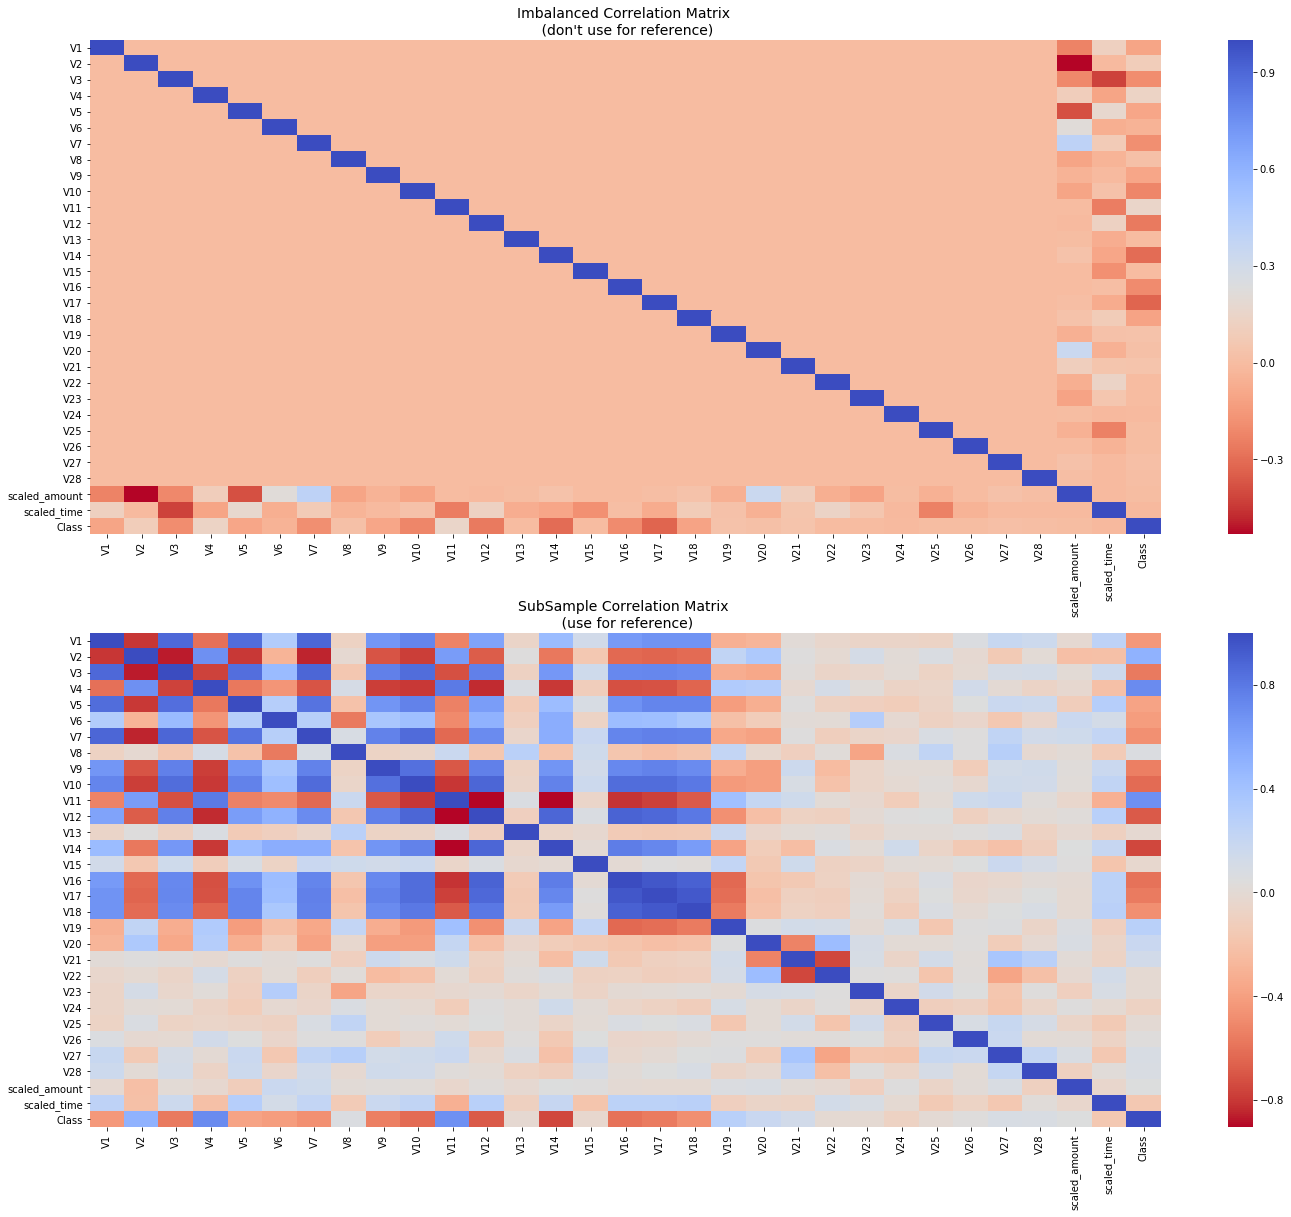

In [92]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

Negative Correlations: V2, V4, V11 and V18 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.
Positive Correlations: V12, V14, V15, and V16 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.

### Dimetion reduction : t-SNE, PCA


In [139]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [140]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50,  random_state=42)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(X.values)



# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA(n_components=2, random_state=42)

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(X.values)


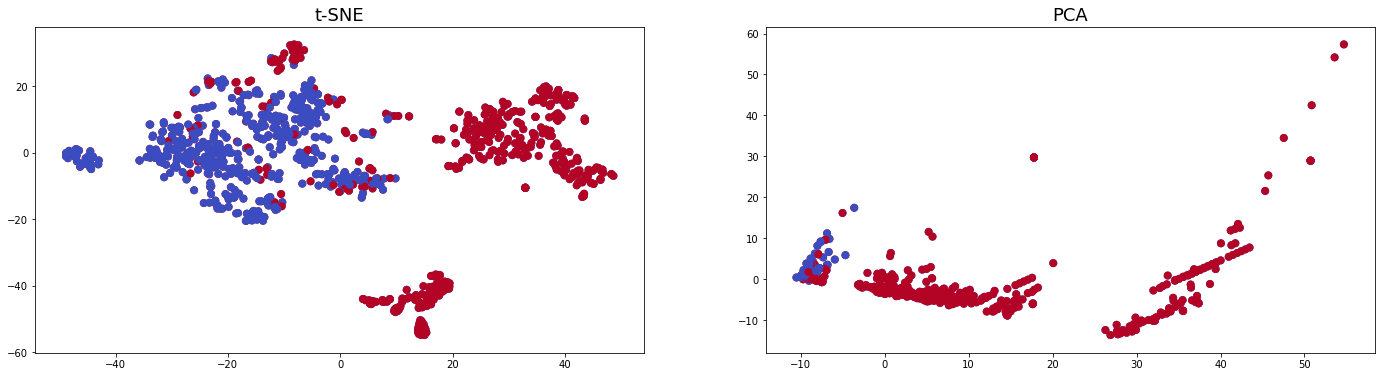

In [141]:


f, (fig1, fig2) = plt.subplots(1, 2, figsize=(24,6))


# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
fig1.scatter(xs, ys, c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
fig1.scatter(xs, ys, c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
fig1.set_title('t-SNE', fontsize=18)


# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
fig2.scatter(xs, ys, c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
fig2.scatter(xs, ys, c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
fig2.set_title('PCA', fontsize=18)
plt.show()







## Synthetic Minority oversampling Technique  (SMOTE)
Uses the characteristics of nearest neighbours of minory cases to creat new synthetic of fraud cases and avoid duplicating. SMOTE can be used for the cases that minorities are allocated in a corner of sample.
In compasirion to under sampling it is more time cosuming.

Resampling should be applied on the training set.
do the training and test set and then resample the traning set.

If you want to do the cross validation, you should do it first and then do the oversampling or under sampling.

In [148]:
X = np.array(df.iloc[:, 1:29])
y = np.array(df.iloc[:, 30])


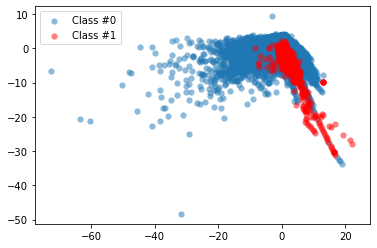

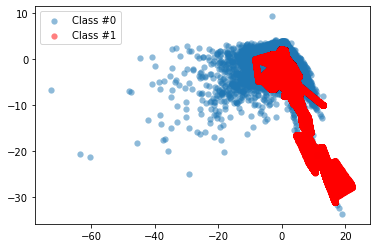

In [149]:
from imblearn.over_sampling import SMOTE

#Split the data set using 'train_test_split' function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


# Define the resampling method
method = SMOTE()

# Create the resampled feature set
X_resampled, y_resampled = method.fit_sample(X_train, y_train)

# Define a function to create a scatter plot of our data and labels
def plot_data(X, y):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()


# Plot the resampled data
plot_data(X, y)
plot_data(X_resampled, y_resampled)


In [150]:
X.shape

(284807, 28)

# LogisticRegression() with and with out resampling

In [151]:
#Split the data set using 'train_test_split' function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Instantiate the model to an empty object
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Train the model using 'fit' method
model.fit(X_train, y_train)

# Test the model using 'predict' method
y_pred = model.predict(X_test)

# Print the classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', conf_mat)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56859
           1       0.90      0.63      0.74       103

    accuracy                           1.00     56962
   macro avg       0.95      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
 [[56852     7]
 [   38    65]]


In [152]:
# This is the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline 

# Define which resampling method and which ML model to use in the pipeline
resampling = SMOTE()
model = LogisticRegression()

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

In [153]:
from sklearn.metrics import confusion_matrix
# Split your data X and y, into a training and a test set and fit the pipeline onto the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     85296
           1       0.06      0.92      0.11       147

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.97      0.99     85443

Confusion matrix:
 [[83141  2155]
 [   12   135]]


Natural hit rate
In this exercise, you'll again use credit card transaction data. The features and labels are similar to the data in the previous chapter, and the data is heavily imbalanced. We've given you features X and labels y to work with already, which are both numpy arrays.

First you need to explore how prevalent fraud is in the dataset, to understand what the "natural accuracy" is, if we were to predict everything as non-fraud. It's is important to understand which level of "accuracy" you need to "beat" in order to get a better prediction than by doing nothing. In the following exercises, you'll create our first random forest classifier for fraud detection. That will serve as the "baseline" model that you're going to try to improve in the upcoming exercises.


# Random Forests Classifiers
They are very usefull for credit cart fraud
1. highly accurate and robust method
2. not suffer from the overfitting problem. it takes the average of all the predictions, which cancels out the biases.




Disadvantage:
1. Computationally expensive




In [83]:
# Count the total number of observations from the length of y
total_obs = len(y)

# Count the total number of non-fraudulent observations 
non_fraud = [i for i in y if i == 0]
count_non_fraud = non_fraud.count(0)

# Calculate the percentage of non fraud observations in the dataset
percentage = (float(count_non_fraud)/float(total_obs)) * 100

# Print the percentage: this is our "natural accuracy" by doing nothing
print(percentage)

99.82725143693798


In [95]:
# Import the random forest model from sklearn
from sklearn.ensemble import RandomForestClassifier

# Split your data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the model as the random forest
model = RandomForestClassifier(random_state=5)

# Fit the model to our training set
model.fit(X_train, y_train)

# Obtain predictions from the test data 
predicted = model.predict(X_test)

In [96]:
# Fit the model to our training set
model.fit(X_train, y_train)

# Obtain predictions from the test data 
predicted = model.predict(X_test)

# Print the accuracy performance metric
print(accuracy_score(y_test, predicted))
print(confusion_matrix(y_test, predicted))

0.9995201479348805
[[85290     6]
 [   35   112]]


We can see that the accuracy has been improved. But howver, accuracy is not a good criteria when we are working with highly imbalanced data. So we can plot a Precision-Recall curve, to investigate the trade-off between the two in your model. In general Precision and Recall are inversely related; as Precision increases, Recall falls and vice-versa. A balance between these two needs to be achieved in the model, otherwise we might end up with many false positives, or not enough actual fraud cases caught. To achieve this and to compare performance, the precision-recall curves come in handy.

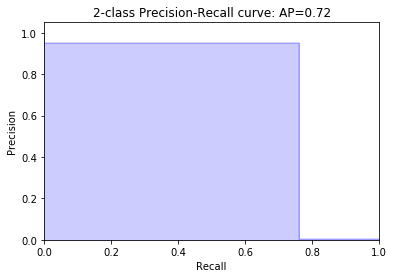

In [91]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


def plot_pr_curve(recall, precision, average_precision):
  plt.step(recall, precision, color='b', alpha=0.2, where='post')
  plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
  plt.show()



# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)


# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall
precision, recall, _ = precision_recall_curve(y_test, predicted)

# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)

## Model adjustments

A simple way to adjust the random forest model to deal with highly imbalanced fraud data, is to use the class_weights option when defining your sklearn model. However, as you will see, it is a bit of a blunt force mechanism and might not work for your very special case. 

In [93]:
#Define the model with balanced subsample
model = RandomForestClassifier(class_weight='balanced_subsample', random_state=5)

# Fit your training model to your training set
model.fit(X_train, y_train)

# Obtain the predicted values and probabilities from the model 
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

# Print the roc_auc_score, the classification report and confusion matrix
print(roc_auc_score(y_test, probs[:,1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

0.9442655157166974
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.96      0.74      0.84       147

    accuracy                           1.00     85443
   macro avg       0.98      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443

[[85292     4]
 [   38   109]]


We can also set the weight menually for our case.

# Ensemble methods: Voting classifier

Now we combine three machine learning models into one, to improve our Random Forest fraud detection model from before. You'll combine our usual Random Forest model, with the Logistic Regression from the previous exercise, with a simple Decision Tree. We can use the short cut get_model_results() to see the immediate result of the ensemble mode.

In [98]:
def get_model_results(X_train, y_train, X_test, y_test, model):
  model.fit(X_train, y_train)
  predicted = model.predict(X_test)
  #probs = model.predict_proba(X_test)
  print (classification_report(y_test, predicted))
  print (confusion_matrix(y_test, predicted))



# Define the Logistic Regression model with weights
model = LogisticRegression(class_weight={0:1, 1:15}, random_state=5)

# Get the model results
get_model_results(X_train, y_train, X_test, y_test, model)



# Import the package
from sklearn.ensemble import VotingClassifier

# Define the three classifiers to use in the ensemble
clf1 = LogisticRegression(class_weight={0:1, 1:15}, random_state=5)
clf2 = RandomForestClassifier(class_weight={0:1, 1:12}, criterion='gini', max_depth=8, max_features='log2',
                              min_samples_leaf=10, n_estimators=30, n_jobs=-1, random_state=5)
clf3 = DecisionTreeClassifier(random_state=5, class_weight="balanced")

# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')

# Get the results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.78      0.82      0.80       147

    accuracy                           1.00     85443
   macro avg       0.89      0.91      0.90     85443
weighted avg       1.00      1.00      1.00     85443

[[85262    34]
 [   27   120]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.85      0.82      0.83       147

    accuracy                           1.00     85443
   macro avg       0.93      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443

[[85275    21]
 [   27   120]]


In [99]:
# Define the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[1, 4, 1], flatten_transform=True)

# Get results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.85      0.82      0.83       147

    accuracy                           1.00     85443
   macro avg       0.92      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443

[[85274    22]
 [   27   120]]


# Unsupervised learning for freud detection


When we do not have any targets we have to look for abnormality in the system. But abnormality is not always fraudulent. It is challeging becazse we can not validate it. 


To identify abnormality we should:

1. Plot the data

2. Look for outliers

3. Inversigate correlations and talk to the fraud analyst.

4. Is the data homogenous or deferent client show different bahaiviour. We can categorize the costumers and define which behaivour is abnormal for them.

In [154]:
df1 = pd.read_csv('dataset/banksim.csv')
df = df1.iloc[:, [1,2,3,4,5]]
print(df.shape)
df.head()

(7200, 5)


,age,gender,category,amount,fraud
0,3,F,es_transportation,49.71,0
1,4,F,es_health,39.29,0
2,3,F,es_transportation,18.76,0
3,4,M,es_transportation,13.95,0
4,2,M,es_transportation,49.87,0


In [156]:
df2 = pd.read_csv('unsupervised/banksim_adj.csv')
dfbig = df2.drop(['Unnamed: 0','fraud'], axis=1)
print(df2.shape)
dfbig.head()

(7189, 19)


,age,amount,M,es_barsandrestaurants,es_contents,es_fashion,es_food,es_health,es_home,es_hotelservices,es_hyper,es_leisure,es_otherservices,es_sportsandtoys,es_tech,es_transportation,es_travel
0,3,49.71,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,4,39.29,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,18.76,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4,13.95,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,49.87,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [159]:
y = df2.loc[:, 'fraud']
print(y.shape)

(7189,)


Group the data by transaction category and take the mean of the data. we use df.groupby() to groupby the categories and use .mean() to get the mean.

In [123]:
# Groupby categories and take the mean 
print(df.groupby('category').mean())

                           amount     fraud
category                                   
es_barsandrestaurants   43.841793  0.022472
es_contents             55.170000  0.000000
es_fashion              59.780769  0.020619
es_food                 35.216050  0.000000
es_health              126.604704  0.242798
es_home                120.688317  0.208333
es_hotelservices       172.756245  0.548387
es_hyper                46.788180  0.125000
es_leisure             229.757600  1.000000
es_otherservices       149.648960  0.600000
es_sportsandtoys       157.251737  0.657895
es_tech                132.852862  0.179487
es_transportation       27.422014  0.000000
es_travel              231.818656  0.944444
es_wellnessandbeauty    66.167078  0.060606


We can see that the majority of fraud is observed, leisure, travel and sports related transactions.

In [125]:
print(df['age'].value_counts())

2    2333
3    1718
4    1279
5     792
1     713
6     314
0      40
U      11
Name: age, dtype: int64


As can be seen, the age groups who are the largest are relatively similar.; as you can see the average amount spent as well as fraud occurrence is rather similar across groups. Age group '0' stands out but since there are only 40 cases, it does not make sense to split these out in a separate group and run a separate model on them.


Let's investigate the average amounts spend in normal transactions versus fraud transactions. This gives you an idea of how fraudulent transactions differ structurally from normal transactions.

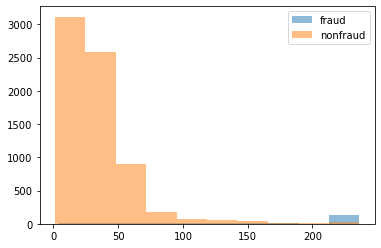

In [127]:
# Create two dataframes with fraud and non-fraud data 
df_fraud = df.loc[df.fraud == 1] 
df_non_fraud = df.loc[df.fraud == 0]

# Plot histograms of the amounts in fraud and non-fraud data 
plt.hist(df_fraud.amount, alpha=0.5, label='fraud')
plt.hist(df_non_fraud.amount, alpha=0.5, label='nonfraud')
plt.legend()
plt.show()

## Assiging fraud and non-fraud by KMEANS sampling

Process of KMEANS sampling:
1. Scaling the data

2. Elbow curve to identify the right amount of clusters

After KMEANS sampling to find outlayers:
1. Find and collect the cluster centers
2. Calculate the distance of each data to their cluster centroid 
3. Define a cut-off point for the distances to define what is the outlier. (For example: Every things which has a bigger distance that the top 95 pectentile.)

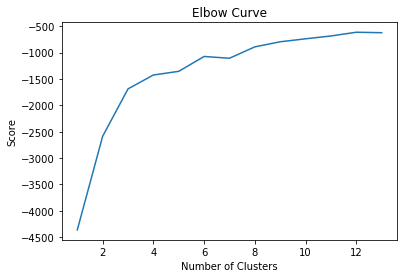

In [141]:
# Import the scaler
from sklearn.preprocessing import MinMaxScaler

# Take the float values of df for X
X = dfbig.values.astype(np.float)

# Define the scaler and apply to the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


# Import MiniBatchKmeans 
from sklearn.cluster import MiniBatchKMeans

# Define the model 
kmeans = MiniBatchKMeans(n_clusters=8, random_state=0)

# Fit the model to the scaled data
kmeans.fit(X_scaled)


# Define the range of clusters to try
clustno = range(1, 14)

# Run MiniBatch Kmeans over the number of clusters
kmeans = [MiniBatchKMeans(n_clusters=i) for i in clustno]

# Obtain the score for each model
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]

# Plot the models and their respective score 
plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [164]:
y = df2.loc[:, 'fraud']
y.shape

(7189,)

In [161]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

# Define K-means model 
kmeans = MiniBatchKMeans(n_clusters=3, random_state=42).fit(X_train)

# Obtain predictions and calculate distance from cluster centroid
X_test_clusters = kmeans.predict(X_test)
X_test_clusters_centers = kmeans.cluster_centers_
dist = [np.linalg.norm(x-y) for x, y in zip(X_test, X_test_clusters_centers[X_test_clusters])]

# Create fraud predictions based on outliers on clusters 
km_y_pred = np.array(dist)
km_y_pred[dist >= np.percentile(dist, 95)] = 1
km_y_pred[dist < np.percentile(dist, 95)] = 0

In [162]:
# Obtain the ROC score
print(roc_auc_score(y_test, km_y_pred))

0.8109115999408585


## Other clustering fraud detection methods: DBscan

DBscan stands for Density-Based Spatial Clustring of Applications with noise. In this method we do not need to predefine amount of clusters.

In DBscan we need to define the maximum distance between data in the clusters and minimum numer of datapoints in clusters. 

KMEANS is working properly when the data has a round shape. DB scan is another usefull method to classify the wierd shaped datapoints.

Rather than considering the outlayers are a fraud. We can also consider the smallest group as a froud

In [169]:
# Define the scaler and apply to the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

labels = y 

# Import DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import silhouette_score


# Initialize and fit the DBscan model
db = DBSCAN(eps=0.9, min_samples=10, n_jobs=-1).fit(X_scaled)

# Obtain the predicted labels and calculate number of clusters
pred_labels = db.labels_
n_clusters = len(set(pred_labels)) - (1 if -1 in labels else 0)

# Print performance metrics for DBscan
print('Estimated number of clusters: %d' % n_clusters)
print("Homogeneity: %0.3f" % homogeneity_score(labels, pred_labels))
print("Silhouette Coefficient: %0.3f" % silhouette_score(X_scaled, pred_labels))

Estimated number of clusters: 23
Homogeneity: 0.612
Silhouette Coefficient: 0.713


1. Count the samples within each cluster by running a bincount on the predicted cluster numbers under pred_labels and print the results.


2. Sort the sample counts and take the top 3 smallest clusters, and print the results

In [170]:
# Count observations in each cluster number
counts = np.bincount(pred_labels[pred_labels >= 0])

# Print the result
print(counts)

[3252  145 2714   55  174  119  122   98   54   15   76   15   43   25
   51   47   42   15   25   20   19   10]


In [171]:
# Count observations in each cluster number
counts = np.bincount(pred_labels[pred_labels>=0])

# Sort the sample counts of the clusters and take the top 3 smallest clusters
smallest_clusters = np.argsort(counts)[:3]

# Print the results 
print("The smallest clusters are clusters:")      
print(smallest_clusters)

The smallest clusters are clusters:
[21 17  9]


In this exercise you're going to check the results of your DBscan fraud detection model. In reality, you often don't have reliable labels and this where a fraud analyst can help you validate the results. He/She can check your results and see whether the cases you flagged are indeed suspicious. You can also check historically known cases of fraud and see whether your model flags them.

In this case, you'll use the fraud labels to check your model results. The predicted cluster numbers are available under pred_labels as well as the original fraud labels labels.

In [172]:
# Create a dataframe of the predicted cluster numbers and fraud labels
df = pd.DataFrame({'clusternr':pred_labels,'fraud':labels})

# Create a condition flagging fraud for the smallest clusters 
df['predicted_fraud'] = np.where((df['clusternr']==21) | (df['clusternr']==17) | (df['clusternr']==9), 1, 0)

# Run a crosstab on the results 
print(pd.crosstab(df['fraud'], df['predicted_fraud'], rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud     0   1
Actual Fraud           
0              6973  16
1               176  24
